In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize']=10,6

In [15]:
location=r"AirPassengers.csv"
df= pd.read_csv(location, encoding='gbk',parse_dates=['Month'],infer_datetime_format=True)
indf=df.set_index(['Month'])

In [16]:
indf.describe()
indf.rename(columns={'#Passengers':'Passengers'},inplace=True)
indf.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


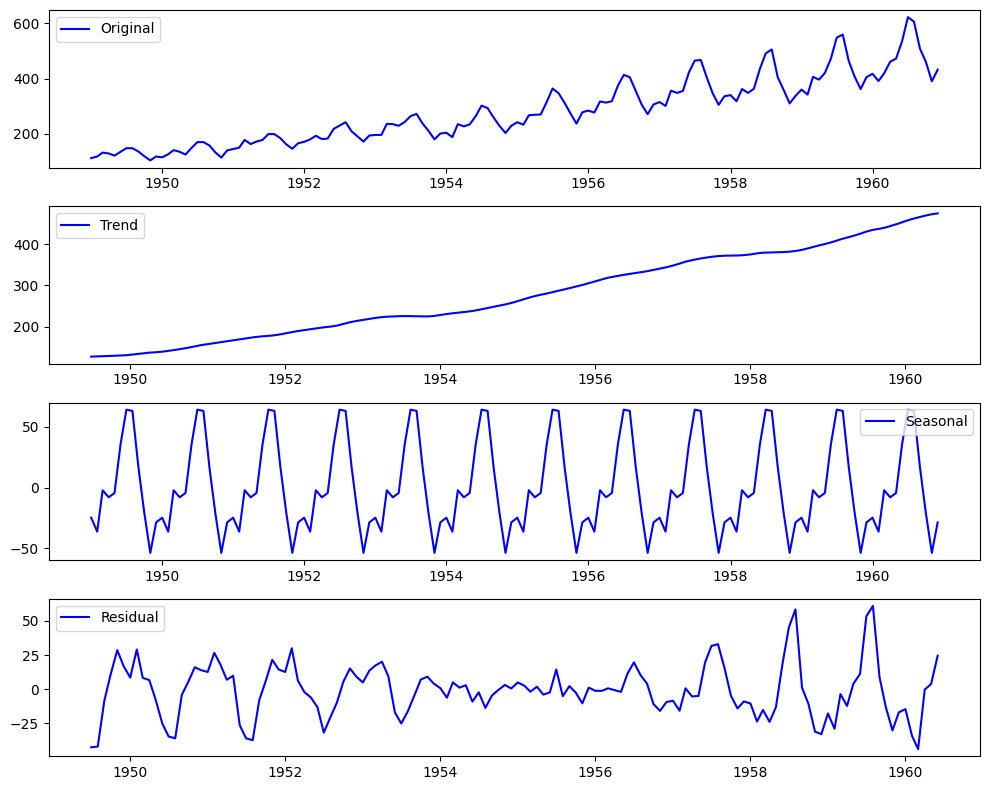

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(indf['Passengers'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(indf['Passengers'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color="blue")
plt.legend(loc='best')
plt.tight_layout()

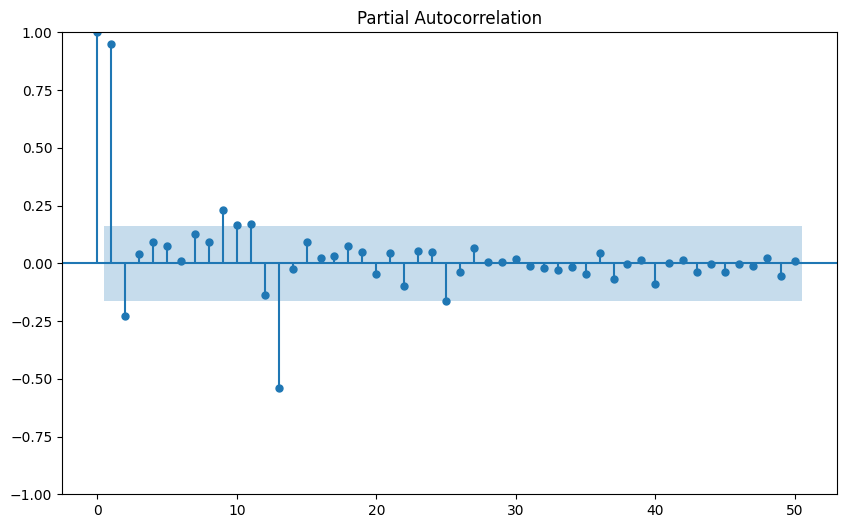

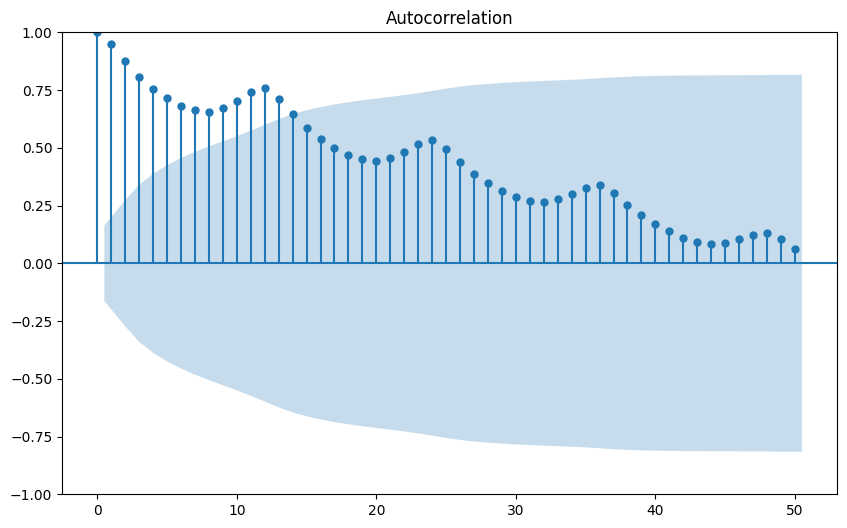

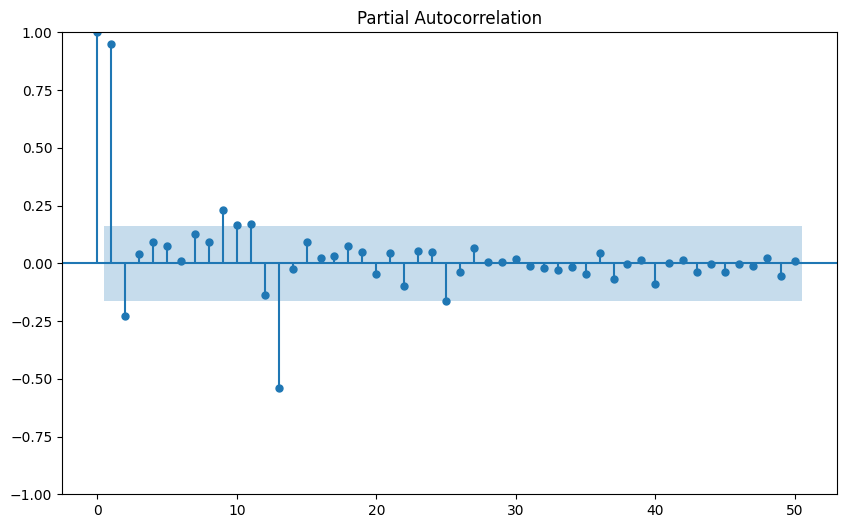

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot
plot_acf(indf['Passengers'], lags=50)

# PACF plot
plot_pacf(indf['Passengers'], lags=50)

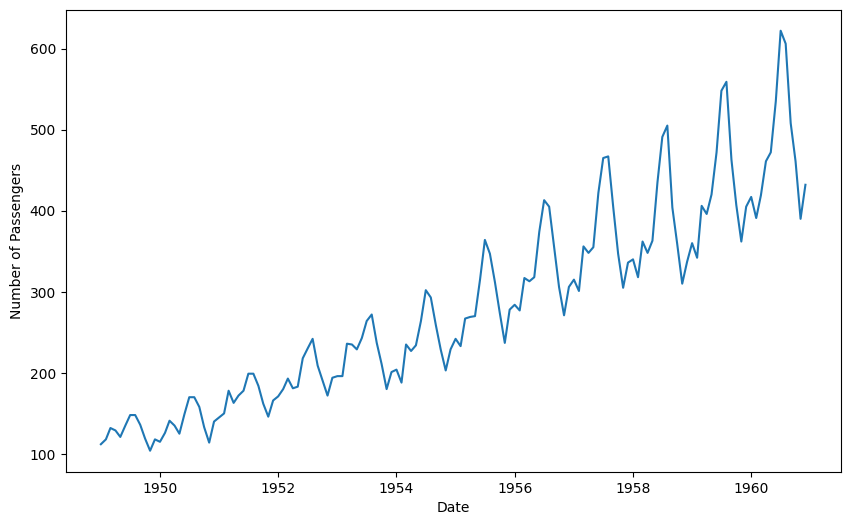

In [19]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(indf)

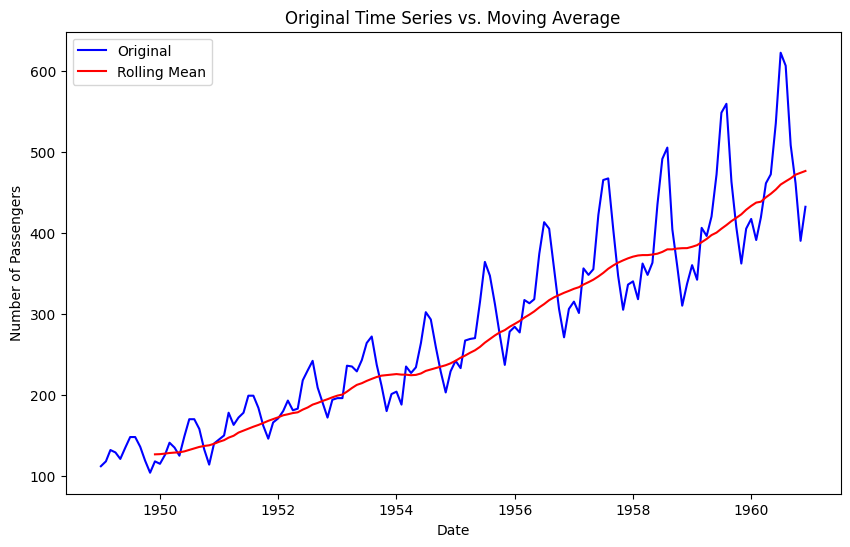

In [20]:
# Calculate the rolling mean (moving average) of the time series
rolling_mean = indf['Passengers'].rolling(window=12).mean()

# Plot the original time series and the moving average
plt.plot(indf['Passengers'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Original Time Series vs. Moving Average')
plt.legend()
plt.show()


In [21]:
indf['months'] = [x.month for x in indf.index]
indf['years'] = [x.year for x in indf.index]

In [22]:
indf.reset_index(drop=True, inplace=True)

In [23]:
X=indf.drop("Passengers",axis=1)
Y= indf["Passengers"]
X_train=X[:int (len(Y)*0.75)]
X_test=X[int(len(Y)*0.75):]
Y_train=Y[:int (len(Y)*0.75)]
Y_test=Y[int(len(Y)*0.75):]

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'Forecast of AirPassengers')

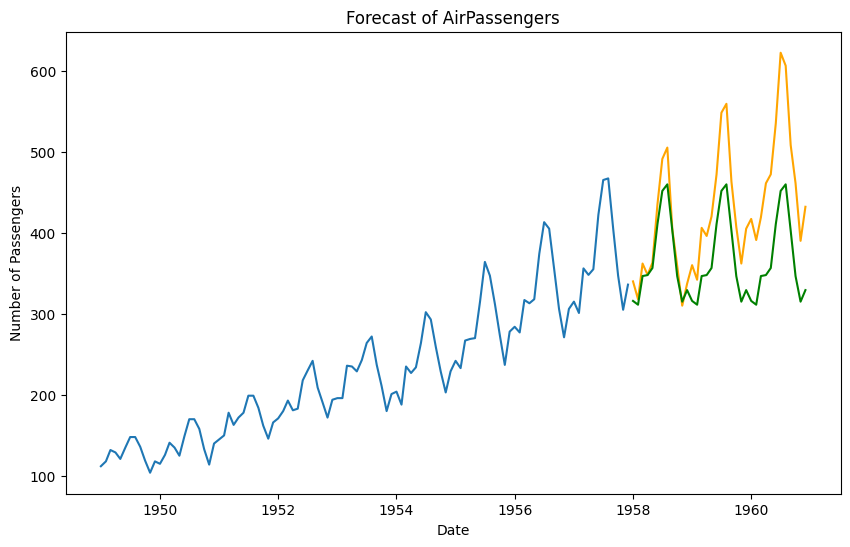

In [25]:
df1=df.set_index(['Month'])
df1.rename(columns={'#Passengers':'Passengers'},inplace=True)
train=df1.Passengers[:int (len(indf.Passengers)*0.75)]
test=df1.Passengers[int(len(indf.Passengers)*0.75):]
preds=rf.predict(X_test)
predictions=pd.DataFrame(preds,columns=['Passengers'])
predictions.index=test.index
plt.plot(train)
plt.plot(test, color='orange', label='actual')
plt.plot(predictions,color='green', label='Forecasts')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title("Forecast of AirPassengers")

In [26]:
print("training score: ", rf.score(X_train, Y_train))
print("testing score: ", rf.score(X_test, Y_test))


training score:  0.9955775644425482
testing score:  0.0430891591263014
